In [1]:
import pandas as pd
import seaborn as sns

# Beetlepalooza Beetle Measurement Data

In [2]:
df = pd.read_csv("https://huggingface.co/datasets/imageomics/BeetlePalooza/resolve/15a82c862588b2e7b709b1aa982161d8c3a7c75f/BeetleMeasurements.csv", low_memory = False)
#df = pd.read_csv("../data/BeetleMeasurements.csv", low_memory = False)
df.head()

,pictureID,scalebar,cm_pix,individual,structure,lying_flat,coords_pix,dist_pix,dist_cm,scientificName,...,siteID,site_name,plotID,user_name,workflowID,genus,species,combinedID,measureID,file_name
0,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraLength,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}",108.115679,1.404100,Carabus goryi,...,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_1,581c1309-6b06-4445-9ed5-55ebe366f6ed,group_images/A00000032929.jpg
1,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,1,ElytraWidth,Yes,"{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",50.159745,0.651425,Carabus goryi,...,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_1,464836fd-853e-40d5-861c-8c279aec6a55,group_images/A00000032929.jpg
2,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,2,ElytraLength,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}",118.562220,1.539769,Carabus goryi,...,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_2,80d48e56-c274-4ca9-854e-07605a62e140,group_images/A00000032929.jpg
3,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,2,ElytraWidth,Yes,"{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",50.328918,0.653622,Carabus goryi,...,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_2,839d9bde-1972-49d6-b31c-8aa81c84c0a2,group_images/A00000032929.jpg
4,A00000032929.jpg,"{""x1"": 815, ""y1"": 244, ""x2"": 892, ""y2"": 244}",77.0,3,ElytraLength,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}",109.165013,1.417727,Carabus goryi,...,HARV,Harvard Forest & Quabbin Watershed NEON,HARV_001,IsaFluck,21652,Carabus,goryi,A00000032929_3,d24c06fa-2779-45f9-8985-71c8e6e9418e,group_images/A00000032929.jpg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39064 entries, 0 to 39063
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pictureID       39064 non-null  object 
 1   scalebar        39064 non-null  object 
 2   cm_pix          39064 non-null  float64
 3   individual      39064 non-null  int64  
 4   structure       39064 non-null  object 
 5   lying_flat      39064 non-null  object 
 6   coords_pix      39064 non-null  object 
 7   dist_pix        39064 non-null  float64
 8   dist_cm         39064 non-null  float64
 9   scientificName  39030 non-null  object 
 10  NEON_sampleID   39064 non-null  object 
 11  siteID          39064 non-null  object 
 12  site_name       39064 non-null  object 
 13  plotID          39064 non-null  object 
 14  user_name       39064 non-null  object 
 15  workflowID      39064 non-null  int64  
 16  genus           39030 non-null  object 
 17  species         39002 non-null 

In [4]:
df.nunique()

pictureID           577
scalebar           1045
cm_pix              327
individual           99
structure             2
lying_flat            2
coords_pix        38724
dist_pix           4198
dist_cm           31566
scientificName       85
NEON_sampleID       576
siteID               30
site_name            43
plotID              144
user_name             3
workflowID            5
genus                36
species              78
combinedID        11104
measureID         39064
file_name           577
dtype: int64

### Fix Outliers for BeetleMeasurements.csv

We saw in EDA-0-2 that we have 2 outliers: Looking at picture, the first one (`A00000046078_10`, annotated by `IsaFluck`) is missing half the elytra (length-wise cut). `A00000046104_10`, annotated by `rileywolcheski`, is just at an angle, length is definitely more than the width. We'll have to adjust both of these to be labeled correctly.

We'll get the `measureID` for each so we can switch the length/width labels, then save the updated `BeetleMeasurements.csv` (this will be the final version). From there we'll update `all_measurement.csv` and create `individual_metadata.csv` with just Isadora's annotations so that we should have one row/pair of measurements per beetle.

In [5]:
df.loc[(df["combinedID"] == "A00000046078_10") & (df["user_name"] == "IsaFluck")]

,pictureID,scalebar,cm_pix,individual,structure,lying_flat,coords_pix,dist_pix,dist_cm,scientificName,...,siteID,site_name,plotID,user_name,workflowID,genus,species,combinedID,measureID,file_name
14542,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraLength,Yes,"{""x1"": 1575, ""y1"": 797, ""x2"": 1570, ""y2"": 830}",33.376639,0.358806,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,lachrymosus,A00000046078_10,c5347b8e-5789-41b6-82f9-5d44228ad48d,group_images/A00000046078.jpg
14543,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraWidth,Yes,"{""x1"": 1574, ""y1"": 812, ""x2"": 1649, ""y2"": 824}",75.953933,0.816520,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,lachrymosus,A00000046078_10,6046bedc-d727-457e-89dc-8bb73183aa32,group_images/A00000046078.jpg


Thankfully there is just one individual with this `combinedID`, so we can save the length and width `measureID`s and re-asign those labels in the `structure` column.

In [6]:
len_meas_id = df.loc[(df["combinedID"] == "A00000046078_10") & (df["user_name"] == "IsaFluck") & (df["structure"] == "ElytraLength"), "measureID"].values[0]
w_meas_id = df.loc[(df["combinedID"] == "A00000046078_10") & (df["user_name"] == "IsaFluck") & (df["structure"] == "ElytraWidth"), "measureID"].values[0]

print(f"We will reasign the measure {len_meas_id} to be structure 'ElytraWidth', and measure {w_meas_id} to be structure 'ElytraLength")

We will reasign the measure c5347b8e-5789-41b6-82f9-5d44228ad48d to be structure 'ElytraWidth', and measure 6046bedc-d727-457e-89dc-8bb73183aa32 to be structure 'ElytraLength


In [7]:
df.loc[df["measureID"] == len_meas_id, "structure"] = "ElytraWidth"
df.loc[df["measureID"] == w_meas_id, "structure"] = "ElytraLength"

df.loc[(df["combinedID"] == "A00000046078_10") & (df["user_name"] == "IsaFluck")]

,pictureID,scalebar,cm_pix,individual,structure,lying_flat,coords_pix,dist_pix,dist_cm,scientificName,...,siteID,site_name,plotID,user_name,workflowID,genus,species,combinedID,measureID,file_name
14542,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraWidth,Yes,"{""x1"": 1575, ""y1"": 797, ""x2"": 1570, ""y2"": 830}",33.376639,0.358806,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,lachrymosus,A00000046078_10,c5347b8e-5789-41b6-82f9-5d44228ad48d,group_images/A00000046078.jpg
14543,A00000046078.jpg,"{""x1"": 1242, ""y1"": 307, ""x2"": 1335, ""y2"": 305}",93.021503,10,ElytraLength,Yes,"{""x1"": 1574, ""y1"": 812, ""x2"": 1649, ""y2"": 824}",75.953933,0.816520,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,IsaFluck,21840,Pterostichus,lachrymosus,A00000046078_10,6046bedc-d727-457e-89dc-8bb73183aa32,group_images/A00000046078.jpg


Perfect!

Now let's fix the other measurements from `A00000046104_10`. Should also be just the two measurements (lenght & width), but we'll double check before proceeding.

In [8]:
df.loc[(df["combinedID"] == "A00000046104_10") & (df["user_name"] == "rileywolcheski")]

,pictureID,scalebar,cm_pix,individual,structure,lying_flat,coords_pix,dist_pix,dist_cm,scientificName,...,siteID,site_name,plotID,user_name,workflowID,genus,species,combinedID,measureID,file_name
20866,A00000046104.jpg,"{""x1"": 943, ""y1"": 305, ""x2"": 1037, ""y2"": 304}",94.005319,10,ElytraLength,Yes,"{""x1"": 1710, ""y1"": 421, ""x2"": 1744, ""y2"": 402}",38.948684,0.414324,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,rileywolcheski,21840,Pterostichus,lachrymosus,A00000046104_10,3c7b6409-60c8-4006-b25e-69bdcc4a37b8,group_images/A00000046104.jpg
20867,A00000046104.jpg,"{""x1"": 943, ""y1"": 305, ""x2"": 1037, ""y2"": 304}",94.005319,10,ElytraWidth,Yes,"{""x1"": 1727, ""y1"": 413, ""x2"": 1766, ""y2"": 473}",71.561163,0.761246,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,rileywolcheski,21840,Pterostichus,lachrymosus,A00000046104_10,42156d07-59af-49cb-a77f-9bd6636c2890,group_images/A00000046104.jpg


Yep, just the two!

In [9]:
len_meas_id = df.loc[(df["combinedID"] == "A00000046104_10") & (df["user_name"] == "rileywolcheski") & (df["structure"] == "ElytraLength"), "measureID"].values[0]
w_meas_id = df.loc[(df["combinedID"] == "A00000046104_10") & (df["user_name"] == "rileywolcheski") & (df["structure"] == "ElytraWidth"), "measureID"].values[0]

print(f"We will reasign the measure {len_meas_id} to be structure 'ElytraWidth', and measure {w_meas_id} to be structure 'ElytraLength")

We will reasign the measure 3c7b6409-60c8-4006-b25e-69bdcc4a37b8 to be structure 'ElytraWidth', and measure 42156d07-59af-49cb-a77f-9bd6636c2890 to be structure 'ElytraLength


In [10]:
df.loc[df["measureID"] == len_meas_id, "structure"] = "ElytraWidth"
df.loc[df["measureID"] == w_meas_id, "structure"] = "ElytraLength"

df.loc[(df["combinedID"] == "A00000046104_10") & (df["user_name"] == "rileywolcheski")]

,pictureID,scalebar,cm_pix,individual,structure,lying_flat,coords_pix,dist_pix,dist_cm,scientificName,...,siteID,site_name,plotID,user_name,workflowID,genus,species,combinedID,measureID,file_name
20866,A00000046104.jpg,"{""x1"": 943, ""y1"": 305, ""x2"": 1037, ""y2"": 304}",94.005319,10,ElytraWidth,Yes,"{""x1"": 1710, ""y1"": 421, ""x2"": 1744, ""y2"": 402}",38.948684,0.414324,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,rileywolcheski,21840,Pterostichus,lachrymosus,A00000046104_10,3c7b6409-60c8-4006-b25e-69bdcc4a37b8,group_images/A00000046104.jpg
20867,A00000046104.jpg,"{""x1"": 943, ""y1"": 305, ""x2"": 1037, ""y2"": 304}",94.005319,10,ElytraLength,Yes,"{""x1"": 1727, ""y1"": 413, ""x2"": 1766, ""y2"": 473}",71.561163,0.761246,Pterostichus lachrymosus,...,MLBS,Mountain Lake Biological Station NEON,MLBS_009,rileywolcheski,21840,Pterostichus,lachrymosus,A00000046104_10,42156d07-59af-49cb-a77f-9bd6636c2890,group_images/A00000046104.jpg


### Save Updated Beetle Measurement CSV

In [11]:
df.to_csv("../data/BeetleMeasurements.csv", index = False)

## Make Individual Measurement Dataset

First, we will update the `all_measurements` CSV, creating an analyzable CSV with measurements by each annotator for each individual (each row will be one pair of measurements).

Then we will reduce to just unique individuals (by reducing to just `user_name == "IsaFluck"`).

In [12]:
df_meas = pd.DataFrame({"combinedID": list(df.loc[df["structure"] == "ElytraWidth", "combinedID"]),
                        "lying_flat": list(df.loc[df["structure"] == "ElytraWidth", "lying_flat"]),    # This is most important/relevant for width measurement anyway (in case of inconsistency, which shouldn't occur)
                        "coords_pix_length": list(df.loc[df["structure"] == "ElytraLength", "coords_pix"]),
                        "coords_pix_width": list(df.loc[df["structure"] == "ElytraWidth", "coords_pix"]),
                        "elytraLength_pix": list(df.loc[df["structure"] == "ElytraLength", "dist_pix"]),
                        "elytraWidth_pix": list(df.loc[df["structure"] == "ElytraWidth", "dist_pix"]),
                        "elytraLength_cm": list(df.loc[df["structure"] == "ElytraLength", "dist_cm"]),
                        "elytraWidth_cm": list(df.loc[df["structure"] == "ElytraWidth", "dist_cm"]),
                        "measureID_length": list(df.loc[df["structure"] == "ElytraLength", "measureID"]),
                        "measureID_width": list(df.loc[df["structure"] == "ElytraWidth", "measureID"]),
                        "genus": list(df.loc[df["structure"] == "ElytraWidth", "genus"]),
                        "species": list(df.loc[df["structure"] == "ElytraWidth", "species"]),
                        "NEON_sampleID": list(df.loc[df["structure"] == "ElytraWidth", "NEON_sampleID"]),
                        "user_name": list(df.loc[df["structure"] == "ElytraWidth", "user_name"]),
                        }) # should match up
df_meas.head()

,combinedID,lying_flat,coords_pix_length,coords_pix_width,elytraLength_pix,elytraWidth_pix,elytraLength_cm,elytraWidth_cm,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name
0,A00000032929_1,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}","{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",108.115679,50.159745,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
1,A00000032929_2,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}","{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",118.562220,50.328918,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
2,A00000032929_3,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}","{""x1"": 481, ""y1"": 378, ""x2"": 533, ""y2"": 381}",109.165013,52.086467,1.417727,0.676448,d24c06fa-2779-45f9-8985-71c8e6e9418e,f6e635e4-ed4f-4b16-bd87-e98c2ac02812,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
3,A00000032929_4,Yes,"{""x1"": 749, ""y1"": 381, ""x2"": 749, ""y2"": 486}","{""x1"": 724, ""y1"": 383, ""x2"": 774, ""y2"": 382}",105.000000,50.009999,1.363636,0.649481,02c24662-60b6-4e28-a8b8-c2aa215ad45f,5b74abcf-1bf5-4b69-a45b-16c03ef881e2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
4,A00000032929_5,Yes,"{""x1"": 978, ""y1"": 417, ""x2"": 996, ""y2"": 519}","{""x1"": 956, ""y1"": 422, ""x2"": 1003, ""y2"": 415}",103.576059,47.518417,1.345144,0.617122,3ff6fd36-e267-4c56-abfc-fca7822e76ea,6e982494-497f-4173-895d-b0a0a6d6c5d6,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck


### A couple plots before we save this

<Axes: xlabel='elytraLength_cm', ylabel='elytraWidth_cm'>

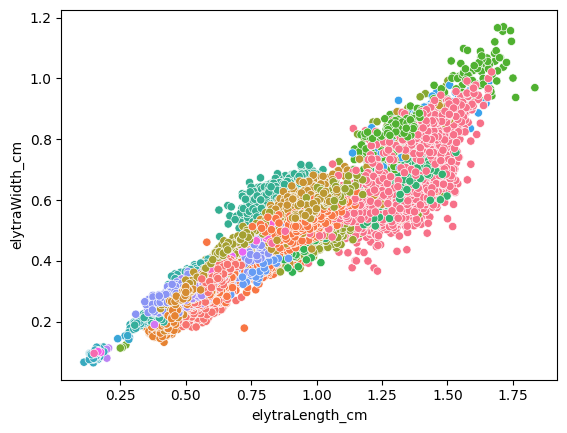

In [13]:
# color by genus

sns.scatterplot(df_meas, x = "elytraLength_cm", y = "elytraWidth_cm", hue = "genus", legend = False)

<Axes: xlabel='elytraLength_cm', ylabel='elytraWidth_cm'>

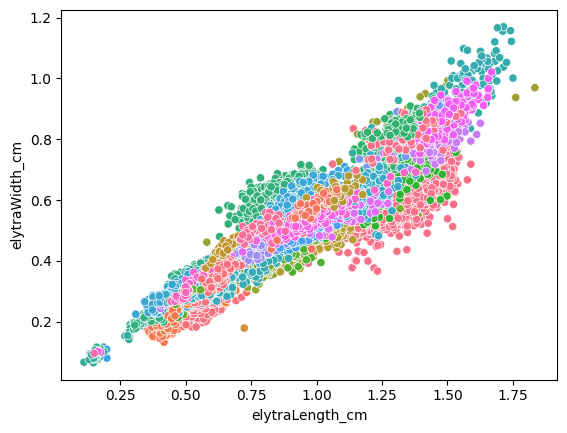

In [14]:
# color by species

sns.scatterplot(df_meas, x = "elytraLength_cm", y = "elytraWidth_cm", hue = "species", legend = False)

### Save Updated Copy of All Measurements
We've now added measurment IDs and fixed the two measurements that were reversed. We'll keep the All Measurements CSV available for comparison across annotators in case there's an interest.

In [15]:
df_meas.to_csv("../metadata/all_measurements.csv", index = False)

## Make Individual CSV

Will have one pair of measurements for each individual with an individual ID based on the measurement IDs. These will be just the measurements done by `user_name == "IsaFluck"`, since she annotated each image and this is the only way to ensure uniqueness based on the Zooniverse individual labeling export.

In [16]:
df_individual = df_meas.loc[df_meas["user_name"] == "IsaFluck"].copy()
df_individual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11459 entries, 0 to 19531
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   combinedID         11459 non-null  object 
 1   lying_flat         11459 non-null  object 
 2   coords_pix_length  11459 non-null  object 
 3   coords_pix_width   11459 non-null  object 
 4   elytraLength_pix   11459 non-null  float64
 5   elytraWidth_pix    11459 non-null  float64
 6   elytraLength_cm    11459 non-null  float64
 7   elytraWidth_cm     11459 non-null  float64
 8   measureID_length   11459 non-null  object 
 9   measureID_width    11459 non-null  object 
 10  genus              11442 non-null  object 
 11  species            11432 non-null  object 
 12  NEON_sampleID      11459 non-null  object 
 13  user_name          11459 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.3+ MB


In [17]:
df_individual.nunique()

combinedID           11078
lying_flat               2
coords_pix_length    11459
coords_pix_width     11459
elytraLength_pix      3420
elytraWidth_pix       1662
elytraLength_cm      10269
elytraWidth_cm        9009
measureID_length     11459
measureID_width      11459
genus                   36
species                 78
NEON_sampleID          576
user_name                1
dtype: int64

This seems like we've lost some individuals considering there were 11,104 unique `combinedID`s in the full dataset, but this is what we have to work with.

### Plots

<Axes: xlabel='elytraLength_cm', ylabel='elytraWidth_cm'>

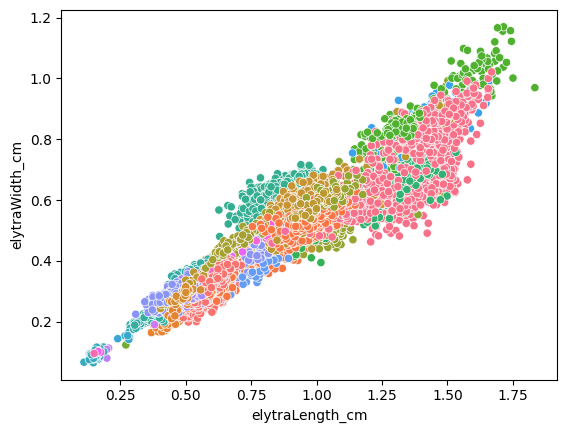

In [18]:
# color by genus

sns.scatterplot(df_individual, x = "elytraLength_cm", y = "elytraWidth_cm", hue = "genus", legend = False)

<Axes: xlabel='elytraLength_cm', ylabel='elytraWidth_cm'>

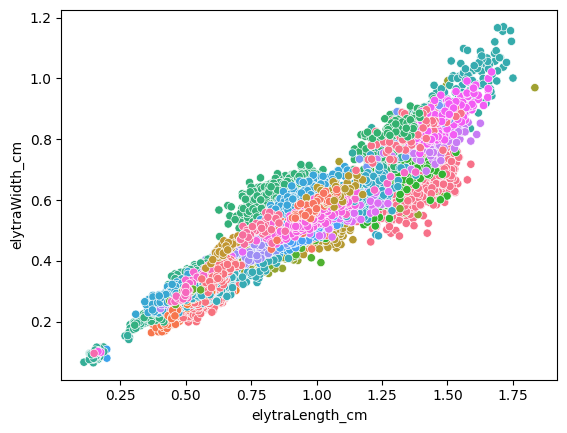

In [19]:
# color by species

sns.scatterplot(df_individual, x = "elytraLength_cm", y = "elytraWidth_cm", hue = "species", legend = False)

### Add Individual ID and Save

We'll add the `individualID`: `<measureID_length>_<measureID_width>` and `file_name`: `individual_images/<individualID>.jpg`, then save this as `individual_metadata_full.csv` for segmentation. Then we'll make the paired-down `individual_metadata.csv` as described in the HF README:

  - `individualID`: ID of beetle in the individual image (`<measureID_length>_<measureID_width>`). This is a unique identifier for this CSV.
  - `combinedID`: Generated from `PictureID` (minus the `.jpg`) plus `_<individual>`. (Matches `combinedID` in `BeetleMeasurements.csv`.)
  - `elytraLength`: Length of the elytra in centimeters. Indicated by the green line in the image below.
  - `elytraWidth`: Width of the elytra in centimeters. Indicated by the purple line in the image below.
  - `measureID_length`: `measureID` from `BeetleMeasurements.csv` for the `elytraLength` of this individual. Can be used to fetch measure-specific information from `BeetleMeasurements.csv`.
  - `measureID_width`: `measureID` from `BeetleMeasurements.csv` for the `elytraWidth` of this individual. Can be used to fetch measure-specific information from `BeetleMeasurements.csv`.
  - `genus`: Genus of the individual (generated by taking the first word in the `scientificName` from `BeetleMeasurements.csv`). There are 36 unique genera labeled.
  - `species`: Species of the individual (generated from the word(s) following the `genus` in the `scientificName` from `BeetleMeasurements.csv). There are 78 unique species labeled.
  - `NEON_sampleID`: NEON identifier for the sample (576 unique IDs), prefixed by the `plotID`. (Matches `NEON_sampleID` in `BeetleMeasurements.csv`.)
  - `file_name`: Relative path to image from the root of the directory (`individual_images/<individualID>.jpg`); allows for image to be displayed in the dataset viewer alongside its associated metadata.

In [20]:
cols = list(df_individual.columns)
cols.insert(0, "individualID")
cols

['individualID',
 'combinedID',
 'lying_flat',
 'coords_pix_length',
 'coords_pix_width',
 'elytraLength_pix',
 'elytraWidth_pix',
 'elytraLength_cm',
 'elytraWidth_cm',
 'measureID_length',
 'measureID_width',
 'genus',
 'species',
 'NEON_sampleID',
 'user_name']

In [21]:
df_individual["individualID"] = df_individual["measureID_length"] + "_" + df_individual["measureID_width"]
df_individual = df_individual[cols].copy()
df_individual.head()

,individualID,combinedID,lying_flat,coords_pix_length,coords_pix_width,elytraLength_pix,elytraWidth_pix,elytraLength_cm,elytraWidth_cm,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name
0,581c1309-6b06-4445-9ed5-55ebe366f6ed_464836fd-...,A00000032929_1,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}","{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",108.115679,50.159745,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
1,80d48e56-c274-4ca9-854e-07605a62e140_839d9bde-...,A00000032929_2,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}","{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",118.562220,50.328918,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
2,d24c06fa-2779-45f9-8985-71c8e6e9418e_f6e635e4-...,A00000032929_3,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}","{""x1"": 481, ""y1"": 378, ""x2"": 533, ""y2"": 381}",109.165013,52.086467,1.417727,0.676448,d24c06fa-2779-45f9-8985-71c8e6e9418e,f6e635e4-ed4f-4b16-bd87-e98c2ac02812,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
3,02c24662-60b6-4e28-a8b8-c2aa215ad45f_5b74abcf-...,A00000032929_4,Yes,"{""x1"": 749, ""y1"": 381, ""x2"": 749, ""y2"": 486}","{""x1"": 724, ""y1"": 383, ""x2"": 774, ""y2"": 382}",105.000000,50.009999,1.363636,0.649481,02c24662-60b6-4e28-a8b8-c2aa215ad45f,5b74abcf-1bf5-4b69-a45b-16c03ef881e2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck
4,3ff6fd36-e267-4c56-abfc-fca7822e76ea_6e982494-...,A00000032929_5,Yes,"{""x1"": 978, ""y1"": 417, ""x2"": 996, ""y2"": 519}","{""x1"": 956, ""y1"": 422, ""x2"": 1003, ""y2"": 415}",103.576059,47.518417,1.345144,0.617122,3ff6fd36-e267-4c56-abfc-fca7822e76ea,6e982494-497f-4173-895d-b0a0a6d6c5d6,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck


In [22]:
df_individual["file_name"] = "individual_images/" + df_individual["individualID"] + ".jpg"
df_individual.head()

,individualID,combinedID,lying_flat,coords_pix_length,coords_pix_width,elytraLength_pix,elytraWidth_pix,elytraLength_cm,elytraWidth_cm,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name,file_name
0,581c1309-6b06-4445-9ed5-55ebe366f6ed_464836fd-...,A00000032929_1,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}","{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",108.115679,50.159745,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/581c1309-6b06-4445-9ed5-55eb...
1,80d48e56-c274-4ca9-854e-07605a62e140_839d9bde-...,A00000032929_2,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}","{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",118.562220,50.328918,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/80d48e56-c274-4ca9-854e-0760...
2,d24c06fa-2779-45f9-8985-71c8e6e9418e_f6e635e4-...,A00000032929_3,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}","{""x1"": 481, ""y1"": 378, ""x2"": 533, ""y2"": 381}",109.165013,52.086467,1.417727,0.676448,d24c06fa-2779-45f9-8985-71c8e6e9418e,f6e635e4-ed4f-4b16-bd87-e98c2ac02812,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/d24c06fa-2779-45f9-8985-71c8...
3,02c24662-60b6-4e28-a8b8-c2aa215ad45f_5b74abcf-...,A00000032929_4,Yes,"{""x1"": 749, ""y1"": 381, ""x2"": 749, ""y2"": 486}","{""x1"": 724, ""y1"": 383, ""x2"": 774, ""y2"": 382}",105.000000,50.009999,1.363636,0.649481,02c24662-60b6-4e28-a8b8-c2aa215ad45f,5b74abcf-1bf5-4b69-a45b-16c03ef881e2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/02c24662-60b6-4e28-a8b8-c2aa...
4,3ff6fd36-e267-4c56-abfc-fca7822e76ea_6e982494-...,A00000032929_5,Yes,"{""x1"": 978, ""y1"": 417, ""x2"": 996, ""y2"": 519}","{""x1"": 956, ""y1"": 422, ""x2"": 1003, ""y2"": 415}",103.576059,47.518417,1.345144,0.617122,3ff6fd36-e267-4c56-abfc-fca7822e76ea,6e982494-497f-4173-895d-b0a0a6d6c5d6,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/3ff6fd36-e267-4c56-abfc-fca7...


In [23]:
df_individual.to_csv("../metadata/individual_metadata_full.csv", index = False)

In [24]:
cols_hf = [col for col in list(df_individual.columns) if "pix" not in col]

df_ind_hf = df_individual[cols_hf].copy()
df_ind_hf.head()

,individualID,combinedID,lying_flat,elytraLength_cm,elytraWidth_cm,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name,file_name
0,581c1309-6b06-4445-9ed5-55ebe366f6ed_464836fd-...,A00000032929_1,Yes,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/581c1309-6b06-4445-9ed5-55eb...
1,80d48e56-c274-4ca9-854e-07605a62e140_839d9bde-...,A00000032929_2,Yes,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/80d48e56-c274-4ca9-854e-0760...
2,d24c06fa-2779-45f9-8985-71c8e6e9418e_f6e635e4-...,A00000032929_3,Yes,1.417727,0.676448,d24c06fa-2779-45f9-8985-71c8e6e9418e,f6e635e4-ed4f-4b16-bd87-e98c2ac02812,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/d24c06fa-2779-45f9-8985-71c8...
3,02c24662-60b6-4e28-a8b8-c2aa215ad45f_5b74abcf-...,A00000032929_4,Yes,1.363636,0.649481,02c24662-60b6-4e28-a8b8-c2aa215ad45f,5b74abcf-1bf5-4b69-a45b-16c03ef881e2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/02c24662-60b6-4e28-a8b8-c2aa...
4,3ff6fd36-e267-4c56-abfc-fca7822e76ea_6e982494-...,A00000032929_5,Yes,1.345144,0.617122,3ff6fd36-e267-4c56-abfc-fca7822e76ea,6e982494-497f-4173-895d-b0a0a6d6c5d6,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/3ff6fd36-e267-4c56-abfc-fca7...


In [25]:
df_ind_hf.rename(columns = {"elytraLength_cm": "elytraLength",
                            "elytraWidth_cm": "elytraWidth"},
                 inplace = True)
df_ind_hf.head(2)

,individualID,combinedID,lying_flat,elytraLength,elytraWidth,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name,file_name
0,581c1309-6b06-4445-9ed5-55ebe366f6ed_464836fd-...,A00000032929_1,Yes,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/581c1309-6b06-4445-9ed5-55eb...
1,80d48e56-c274-4ca9-854e-07605a62e140_839d9bde-...,A00000032929_2,Yes,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/80d48e56-c274-4ca9-854e-0760...


In [28]:
# remove user_name column

cols_to_keep = [col for col in list(df_ind_hf.columns) if col != "user_name"]

In [29]:
df_ind_hf[cols_to_keep].to_csv("../data/individual_metadata.csv", index = False)

# Add Full and Re-sized Image dimensions to individual full measurements for Segmentation

Michelle added the resized dimensions to the Beetle Measurments CSV and we will add them to the full individual measurements CSV for easier segmentation processing.

In [2]:
# from commit 10f6ed40764864e1edc0c0022f66642367161606 on HF
df = pd.read_csv("https://huggingface.co/datasets/imageomics/2018-NEON-beetles/resolve/main/BeetleMeasurements.csv", low_memory = False)
# from commit f22355e on GH
df_ind = pd.read_csv("../metadata/individual_metadata_full.csv", low_memory=False)

print(df.columns)
print(df_ind.columns)

Index(['pictureID', 'scalebar', 'cm_pix', 'individual', 'structure',
       'lying_flat', 'coords_pix', 'dist_pix', 'dist_cm', 'scientificName',
       'NEON_sampleID', 'siteID', 'site_name', 'plotID', 'user_name',
       'workflowID', 'genus', 'species', 'combinedID', 'measureID',
       'file_name', 'image_dim', 'resized_image_dim', 'coords_pix_scaled_up'],
      dtype='object')
Index(['individualID', 'combinedID', 'lying_flat', 'coords_pix_length',
       'coords_pix_width', 'elytraLength_pix', 'elytraWidth_pix',
       'elytraLength_cm', 'elytraWidth_cm', 'measureID_length',
       'measureID_width', 'genus', 'species', 'NEON_sampleID', 'user_name',
       'file_name'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39064 entries, 0 to 39063
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pictureID             39064 non-null  object 
 1   scalebar              39064 non-null  object 
 2   cm_pix                39064 non-null  float64
 3   individual            39064 non-null  int64  
 4   structure             39064 non-null  object 
 5   lying_flat            39064 non-null  object 
 6   coords_pix            39064 non-null  object 
 7   dist_pix              39064 non-null  float64
 8   dist_cm               39064 non-null  float64
 9   scientificName        39030 non-null  object 
 10  NEON_sampleID         39064 non-null  object 
 11  siteID                39064 non-null  object 
 12  site_name             39064 non-null  object 
 13  plotID                39064 non-null  object 
 14  user_name             39064 non-null  object 
 15  workflowID         

In [4]:
df_ind.head()

,individualID,combinedID,lying_flat,coords_pix_length,coords_pix_width,elytraLength_pix,elytraWidth_pix,elytraLength_cm,elytraWidth_cm,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name,file_name
0,581c1309-6b06-4445-9ed5-55ebe366f6ed_464836fd-...,A00000032929_1,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}","{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",108.115679,50.159745,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/581c1309-6b06-4445-9ed5-55eb...
1,80d48e56-c274-4ca9-854e-07605a62e140_839d9bde-...,A00000032929_2,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}","{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",118.562220,50.328918,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/80d48e56-c274-4ca9-854e-0760...
2,d24c06fa-2779-45f9-8985-71c8e6e9418e_f6e635e4-...,A00000032929_3,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}","{""x1"": 481, ""y1"": 378, ""x2"": 533, ""y2"": 381}",109.165013,52.086467,1.417727,0.676448,d24c06fa-2779-45f9-8985-71c8e6e9418e,f6e635e4-ed4f-4b16-bd87-e98c2ac02812,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/d24c06fa-2779-45f9-8985-71c8...
3,02c24662-60b6-4e28-a8b8-c2aa215ad45f_5b74abcf-...,A00000032929_4,Yes,"{""x1"": 749, ""y1"": 381, ""x2"": 749, ""y2"": 486}","{""x1"": 724, ""y1"": 383, ""x2"": 774, ""y2"": 382}",105.000000,50.009999,1.363636,0.649481,02c24662-60b6-4e28-a8b8-c2aa215ad45f,5b74abcf-1bf5-4b69-a45b-16c03ef881e2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/02c24662-60b6-4e28-a8b8-c2aa...
4,3ff6fd36-e267-4c56-abfc-fca7822e76ea_6e982494-...,A00000032929_5,Yes,"{""x1"": 978, ""y1"": 417, ""x2"": 996, ""y2"": 519}","{""x1"": 956, ""y1"": 422, ""x2"": 1003, ""y2"": 415}",103.576059,47.518417,1.345144,0.617122,3ff6fd36-e267-4c56-abfc-fca7822e76ea,6e982494-497f-4173-895d-b0a0a6d6c5d6,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/3ff6fd36-e267-4c56-abfc-fca7...


In [5]:
for comboID in list(df_ind["combinedID"].unique()):
    temp = df.loc[df["combinedID"] == comboID].copy()
    if temp.shape[0] > 0:
        df_ind.loc[df_ind["combinedID"] == comboID, "image_dim"] = temp["image_dim"].values[0]
        df_ind.loc[df_ind["combinedID"] == comboID, "resized_image_dim"] = temp["resized_image_dim"].values[0]
        df_ind.loc[df_ind["combinedID"] == comboID, "coords_pix_scaled_up"] = temp["coords_pix_scaled_up"].values[0]
    else:
        print(f"{comboID} missing")
    
df_ind.head()

,individualID,combinedID,lying_flat,coords_pix_length,coords_pix_width,elytraLength_pix,elytraWidth_pix,elytraLength_cm,elytraWidth_cm,measureID_length,measureID_width,genus,species,NEON_sampleID,user_name,file_name,image_dim,resized_image_dim,coords_pix_scaled_up
0,581c1309-6b06-4445-9ed5-55ebe366f6ed_464836fd-...,A00000032929_1,Yes,"{""x1"": 1055, ""y1"": 154, ""x2"": 1163, ""y2"": 149}","{""x1"": 1053, ""y1"": 129, ""x2"": 1057, ""y2"": 179}",108.115679,50.159745,1.404100,0.651425,581c1309-6b06-4445-9ed5-55ebe366f6ed,464836fd-853e-40d5-861c-8c279aec6a55,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/581c1309-6b06-4445-9ed5-55eb...,"(3712, 5568, 3)","(1299, 1949, 3)","{'x1': 3014, 'y1': 439, 'x2': 3323, 'y2': 425}"
1,80d48e56-c274-4ca9-854e-07605a62e140_839d9bde-...,A00000032929_2,Yes,"{""x1"": 1390, ""y1"": 150, ""x2"": 1314, ""y2"": 241}","{""x1"": 1369, ""y1"": 136, ""x2"": 1407, ""y2"": 169}",118.562220,50.328918,1.539769,0.653622,80d48e56-c274-4ca9-854e-07605a62e140,839d9bde-1972-49d6-b31c-8aa81c84c0a2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/80d48e56-c274-4ca9-854e-0760...,"(3712, 5568, 3)","(1299, 1949, 3)","{'x1': 3972, 'y1': 428, 'x2': 3754, 'y2': 688}"
2,d24c06fa-2779-45f9-8985-71c8e6e9418e_f6e635e4-...,A00000032929_3,Yes,"{""x1"": 507, ""y1"": 378, ""x2"": 501, ""y2"": 487}","{""x1"": 481, ""y1"": 378, ""x2"": 533, ""y2"": 381}",109.165013,52.086467,1.417727,0.676448,d24c06fa-2779-45f9-8985-71c8e6e9418e,f6e635e4-ed4f-4b16-bd87-e98c2ac02812,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/d24c06fa-2779-45f9-8985-71c8...,"(3712, 5568, 3)","(1299, 1949, 3)","{'x1': 1448, 'y1': 1079, 'x2': 1431, 'y2': 1391}"
3,02c24662-60b6-4e28-a8b8-c2aa215ad45f_5b74abcf-...,A00000032929_4,Yes,"{""x1"": 749, ""y1"": 381, ""x2"": 749, ""y2"": 486}","{""x1"": 724, ""y1"": 383, ""x2"": 774, ""y2"": 382}",105.000000,50.009999,1.363636,0.649481,02c24662-60b6-4e28-a8b8-c2aa215ad45f,5b74abcf-1bf5-4b69-a45b-16c03ef881e2,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/02c24662-60b6-4e28-a8b8-c2aa...,"(3712, 5568, 3)","(1299, 1949, 3)","{'x1': 2140, 'y1': 1088, 'x2': 2140, 'y2': 1388}"
4,3ff6fd36-e267-4c56-abfc-fca7822e76ea_6e982494-...,A00000032929_5,Yes,"{""x1"": 978, ""y1"": 417, ""x2"": 996, ""y2"": 519}","{""x1"": 956, ""y1"": 422, ""x2"": 1003, ""y2"": 415}",103.576059,47.518417,1.345144,0.617122,3ff6fd36-e267-4c56-abfc-fca7822e76ea,6e982494-497f-4173-895d-b0a0a6d6c5d6,Carabus,goryi,HARV_001.20180605.CARGOR.01,IsaFluck,individual_images/3ff6fd36-e267-4c56-abfc-fca7...,"(3712, 5568, 3)","(1299, 1949, 3)","{'x1': 2794, 'y1': 1191, 'x2': 2846, 'y2': 1482}"


In [6]:
# Save to CSV

df_ind.to_csv("../metadata/individual_metadata_full.csv", index = False)